In [1]:
import dask
import pandas as pd
import time
import json
import numpy as np
import datetime as dt
from glob import glob
from pathlib import Path

In [2]:
filenames = sorted(glob('C:/Users/JvHeeswijck/Desktop/temp/2gb-*'))
filenames

['C:/Users/JvHeeswijck/Desktop/temp\\2gb-01.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-02.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-03.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-04.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-05.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-06.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-07.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-08.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-09.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-10.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-11.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-12.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-13.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-14.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-15.txt',
 'C:/Users/JvHeeswijck/Desktop/temp\\2gb-16.txt']

In [3]:
len(filenames)

16

In [29]:
# def load_day(filename, rows=None):
#     events = []
#     i = 0
#     with open(filename, 'r') as f:
#         for line in f.readlines():
#             events.append(json.loads(line))            
#     return events

In [30]:
# # Approach 1 Pandas
# start_time = time.time()
# raw_data = load_day(filenames[-1])
# df = pd.DataFrame(raw_data)
# df[df.event_name == "click"].groupby('user_id').count()['event_name'].mean()
# end_time = time.time() - start_time
# end_time

# Functions

In [4]:
def run_experiment(func, trials=3, extent=5, specific=None):
    if specific:
        file_counts = [specific]
        completion_times = []

        for file_set in file_counts:
            files = filenames[:file_set]
            print(f'Working on {file_set}x1GB')
            times = []
            for i in range(trials):
                print(f'Trial #{i}')
                start_time = time.time()
                func(files)
                end_time = time.time() - start_time
                print(f"Completed Trial #{i} in {end_time}")
                times.append(end_time)
            print(f"Completed {file_set}x1GB': {times}")
            completion_times.append(times)
        return completion_times
    else:
        file_counts = [1,2,4,8,16][:extent]
        completion_times = []

        for file_set in file_counts:
            files = filenames[:file_set]
            print(f'Working on {file_set}x1GB')
            times = []
            for i in range(trials):
                print(f'Trial #{i}')
                start_time = time.time()
                func(files)
                end_time = time.time() - start_time
                print(f"Completed Trial #{i} in {end_time}")
                times.append(end_time)
            print(f"Completed {file_set}x1GB': {times}")
            completion_times.append(times)
        return completion_times

# Single Node

In [5]:
def load_day_filter(filename, event_filter):
    events = []
    i = 0
    with open(filename, 'r') as f:
        while(True):
            line = f.readline()
            if not line: 
                break
            line = json.loads(line)
            if line['event_name'] == event_filter:
                events.append(line)
            else:
                pass
    return events

## Task 1

In [24]:
# Approach 1 Pandas
def load_day_filter(filename, event_filter):
    events = []
    i = 0
    with open(filename, 'r') as f:
        while(True):
            line = f.readline()
            if not line: 
                break
            line = json.loads(line)
            if line['event_name'] == event_filter:
                events.append(line)
            else:
                pass
    return events

file_counts = [1,2,4,8]
completion_times = []
trials = 3

for file_set in file_counts:
    print(f'Working on {file_set}x1GB')
    times = []
    for i in range(trials):
        print(f'Trial #{i}')
        
        dfs = []
        
        start_time = time.time()
        
        for j in range(file_set):
            raw_data = load_day_filter(filenames[j], 'click')
            df = pd.DataFrame(raw_data)
            result = df[df.event_name == "click"].groupby('user_id')['event_name'].count().copy()
            dfs.append(result)
        end_result = sum(dfs) / 2
        
        end_time = time.time() - start_time
        print(f"Completed Trial #{i} in {end_time}")
        times.append(end_time)
    print(f"Completed {file_set}x1GB': {times}")
    completion_times.append(times)

Working on 1x1GB
Trial #0
Completed Trial #0 in 21.89435648918152
Trial #1
Completed Trial #1 in 21.97335982322693
Trial #2
Completed Trial #2 in 21.87336015701294
Completed 1x1GB': [21.89435648918152, 21.97335982322693, 21.87336015701294]
Working on 2x1GB
Trial #0
Completed Trial #0 in 43.66983771324158
Trial #1
Completed Trial #1 in 43.726288080215454
Trial #2
Completed Trial #2 in 43.40997099876404
Completed 2x1GB': [43.66983771324158, 43.726288080215454, 43.40997099876404]
Working on 4x1GB
Trial #0
Completed Trial #0 in 87.85309743881226
Trial #1
Completed Trial #1 in 105.40366768836975
Trial #2
Completed Trial #2 in 93.38315844535828
Completed 4x1GB': [87.85309743881226, 105.40366768836975, 93.38315844535828]
Working on 8x1GB
Trial #0
Completed Trial #0 in 187.28150248527527
Trial #1
Completed Trial #1 in 185.5371549129486
Trial #2
Completed Trial #2 in 184.86115193367004
Completed 8x1GB': [187.28150248527527, 185.5371549129486, 184.86115193367004]


In [25]:
completion_times

[[21.89435648918152, 21.97335982322693, 21.87336015701294],
 [43.66983771324158, 43.726288080215454, 43.40997099876404],
 [87.85309743881226, 105.40366768836975, 93.38315844535828],
 [187.28150248527527, 185.5371549129486, 184.86115193367004]]

In [7]:
# Approach 1 Pandas
def task_1_pandas(files):        
    dfs = []        
    for file in files:
        raw_data = load_day_filter(file, 'click')
        df = pd.DataFrame(raw_data)
        result = df[df.event_name == "click"].groupby('user_id')['event_name'].count().copy()
        dfs.append(result)
    end_result = sum(dfs) / 2

In [6]:
run_experiment(task_1_pandas, 1, 1)

Working on 1x1GB
Trial #0
Completed Trial #0 in 23.2705500125885
Completed 1x1GB': [23.2705500125885]


[[23.2705500125885]]

In [8]:
#2GB
timingstask1 = run_experiment(task_1_pandas)
print(timingstask1)

Working on 1x1GB
Trial #0
Completed Trial #0 in 45.31579065322876
Trial #1
Completed Trial #1 in 45.972548723220825
Trial #2
Completed Trial #2 in 45.11304306983948
Completed 1x1GB': [45.31579065322876, 45.972548723220825, 45.11304306983948]
Working on 2x1GB
Trial #0
Completed Trial #0 in 92.39483976364136
Trial #1
Completed Trial #1 in 92.75969004631042
Trial #2
Completed Trial #2 in 91.96012353897095
Completed 2x1GB': [92.39483976364136, 92.75969004631042, 91.96012353897095]
Working on 4x1GB
Trial #0
Completed Trial #0 in 183.04523634910583
Trial #1
Completed Trial #1 in 183.34292006492615
Trial #2
Completed Trial #2 in 183.54345202445984
Completed 4x1GB': [183.04523634910583, 183.34292006492615, 183.54345202445984]
Working on 8x1GB
Trial #0
Completed Trial #0 in 374.84545278549194
Trial #1
Completed Trial #1 in 368.40002489089966
Trial #2
Completed Trial #2 in 378.9322581291199
Completed 8x1GB': [374.84545278549194, 368.40002489089966, 378.9322581291199]
Working on 16x1GB
Trial #0
C

## Task 2

In [11]:
def task_2_pandas(files):        
    df_pro = []
    df_count = []
    for file in files:
        raw_data = load_day_filter(file, 'media_exit')
        df = pd.DataFrame(raw_data)
        result = result = df.groupby('fild_id').agg({
            'progress': 'sum',
            'fild_id': 'count'
        }).copy()
        df_pro.append(result.progress)
        df_count.append(result.fild_id)
    end_result = sum(df_pro) / sum(df_count)
    return np.argmax(end_result)

In [12]:
timingstask2 = run_experiment(task_2_pandas)
print('-----------COMPLETE----------')
print(timingstask2)

Working on 1x1GB
Trial #0
Completed Trial #0 in 47.65490508079529
Trial #1
Completed Trial #1 in 45.98854470252991
Trial #2
Completed Trial #2 in 46.47424554824829
Completed 1x1GB': [47.65490508079529, 45.98854470252991, 46.47424554824829]
Working on 2x1GB
Trial #0
Completed Trial #0 in 94.70770001411438
Trial #1
Completed Trial #1 in 93.79895186424255
Trial #2
Completed Trial #2 in 94.64050936698914
Completed 2x1GB': [94.70770001411438, 93.79895186424255, 94.64050936698914]
Working on 4x1GB
Trial #0
Completed Trial #0 in 189.54025149345398
Trial #1
Completed Trial #1 in 185.85431432724
Trial #2
Completed Trial #2 in 186.70089554786682
Completed 4x1GB': [189.54025149345398, 185.85431432724, 186.70089554786682]
Working on 8x1GB
Trial #0
Completed Trial #0 in 376.2084662914276
Trial #1
Completed Trial #1 in 381.2665033340454
Trial #2
Completed Trial #2 in 377.26955580711365
Completed 8x1GB': [376.2084662914276, 381.2665033340454, 377.26955580711365]
Working on 16x1GB
Trial #0
Completed T

In [ ]:
#2GB
run_experiment(task_2_pandas)

## Task 3

In [14]:
cutoff = dt.time(hour=12)
def task_3_pandas(files):        
    dfs = []        
    for file in files:
        raw_data = load_day_filter(file, 'item_search')
        df = pd.DataFrame(raw_data)
        df.event_timestamp = pd.to_datetime(df.event_timestamp).map(lambda x: x.time())
        df = df[(df.geo == 'Canada') & (df.event_timestamp < cutoff)]
        result = df.groupby('search_text')['event_name'].count().copy()
        dfs.append(result)
    return np.argmax(sum(dfs))

In [28]:
test1 = run_experiment(task_3_pandas)

Working on 1x1GB
Trial #0
Completed Trial #0 in 24.529842138290405
Trial #1
Completed Trial #1 in 24.295011043548584
Trial #2
Completed Trial #2 in 24.340953826904297
Completed 1x1GB': [24.529842138290405, 24.295011043548584, 24.340953826904297]
Working on 2x1GB
Trial #0
Completed Trial #0 in 49.29638123512268
Trial #1
Completed Trial #1 in 48.96074414253235
Trial #2
Completed Trial #2 in 48.8717987537384
Completed 2x1GB': [49.29638123512268, 48.96074414253235, 48.8717987537384]
Working on 4x1GB
Trial #0
Completed Trial #0 in 99.44148755073547
Trial #1
Completed Trial #1 in 105.02938413619995
Trial #2
Completed Trial #2 in 104.6975748538971
Completed 4x1GB': [99.44148755073547, 105.02938413619995, 104.6975748538971]
Working on 8x1GB
Trial #0
Completed Trial #0 in 209.78825116157532
Trial #1
Completed Trial #1 in 206.12767148017883
Trial #2
Completed Trial #2 in 199.1298315525055
Completed 8x1GB': [209.78825116157532, 206.12767148017883, 199.1298315525055]


In [15]:
timingstask3 = run_experiment(task_3_pandas)
print('-----------COMPLETE----------')
print(timingstask3)

Working on 1x1GB
Trial #0
Completed Trial #0 in 51.875269174575806
Trial #1
Completed Trial #1 in 50.18212819099426
Trial #2
Completed Trial #2 in 50.62740874290466
Completed 1x1GB': [51.875269174575806, 50.18212819099426, 50.62740874290466]
Working on 2x1GB
Trial #0
Completed Trial #0 in 102.72096753120422
Trial #1
Completed Trial #1 in 102.72421646118164
Trial #2
Completed Trial #2 in 101.85596561431885
Completed 2x1GB': [102.72096753120422, 102.72421646118164, 101.85596561431885]
Working on 4x1GB
Trial #0
Completed Trial #0 in 205.81236505508423
Trial #1
Completed Trial #1 in 210.4114739894867
Trial #2
Completed Trial #2 in 209.94847130775452
Completed 4x1GB': [205.81236505508423, 210.4114739894867, 209.94847130775452]
Working on 8x1GB
Trial #0
Completed Trial #0 in 412.8463125228882
Trial #1
Completed Trial #1 in 417.8202860355377
Trial #2
Completed Trial #2 in 420.44807600975037
Completed 8x1GB': [412.8463125228882, 417.8202860355377, 420.44807600975037]
Working on 16x1GB
Trial #0

In [17]:
raw_data = load_day_filter(filenames[0], 'item_search')
df = pd.DataFrame(raw_data)

In [18]:
df.event_timestamp = pd.to_datetime(df.event_timestamp).map(lambda x: x.time())

In [22]:
result = df.groupby('search_text')['event_name'].count().copy()

In [23]:
result

search_text
0000000000000000000000000000000000000000.mp4    4974
0000000000000000000000000000000000000001.mp4    4962
0000000000000000000000000000000000000002.mp4    5016
0000000000000000000000000000000000000003.mp4    4722
0000000000000000000000000000000000000004.mp4    4843
0000000000000000000000000000000000000005.mp4    4916
0000000000000000000000000000000000000006.mp4    4958
0000000000000000000000000000000000000007.mp4    4875
0000000000000000000000000000000000000008.mp4    5012
0000000000000000000000000000000000000009.mp4    4935
0000000000000000000000000000000000000010.mp4    5043
0000000000000000000000000000000000000011.mp4    4976
0000000000000000000000000000000000000012.mp4    4884
0000000000000000000000000000000000000013.mp4    4865
0000000000000000000000000000000000000014.mp4    4929
0000000000000000000000000000000000000015.mp4    4917
0000000000000000000000000000000000000016.mp4    4967
0000000000000000000000000000000000000017.mp4    5087
0000000000000000000000000000000000

## All

In [43]:
task1 = run_experiment(task_1_pandas, specific=16)
print(task1)

Working on 16x1GB
Trial #0
Completed Trial #0 in 359.2482006549835
Trial #1
Completed Trial #1 in 374.31591844558716
Trial #2
Completed Trial #2 in 358.89927315711975
Completed 16x1GB': [359.2482006549835, 374.31591844558716, 358.89927315711975]
[[359.2482006549835, 374.31591844558716, 358.89927315711975]]


In [44]:
task2 = task1 = run_experiment(task_2_pandas, specific=16)
print(task2)

Working on 16x1GB
Trial #0
Completed Trial #0 in 354.157185792923
Trial #1
Completed Trial #1 in 345.87911200523376
Trial #2
Completed Trial #2 in 357.46568965911865
Completed 16x1GB': [354.157185792923, 345.87911200523376, 357.46568965911865]
[[354.157185792923, 345.87911200523376, 357.46568965911865]]


In [45]:
task3 = run_experiment(task_3_pandas, specific=16)
print(task3)

Working on 16x1GB
Trial #0
Completed Trial #0 in 406.08000802993774
Trial #1
Completed Trial #1 in 400.93052530288696
Trial #2
Completed Trial #2 in 401.0856206417084
Completed 16x1GB': [406.08000802993774, 400.93052530288696, 401.0856206417084]
[[406.08000802993774, 400.93052530288696, 401.0856206417084]]


## Task Merge

In [ ]:
# file_count = 12
# client = Client(n_workers=8)
# @delayed
# def load_day_filter(filename, event_filter):
#     events = []
#     i = 0
#     with open(filename, 'r') as f:
#         while(True):
#             line = f.readline()
#             if not line: 
#                 break
#             line = json.loads(line)
#             if line['event_name'] == event_filter:
#                 events.append(line)
#             else:
#                 pass
#     return events
# delayed_df = delayed(pd.DataFrame)

# start_time = time.time()
# means = []
# for file in filenames[:file_count]:
#     raw_data = load_day_filter(file, 'click')
#     df = delayed_df(raw_data)
#     means.append(df[df.event_name == "click"].groupby('user_id').count()['event_name'].mean())
# result = delayed(lambda x: x)(means)

In [ ]:
# start_time = time.time()
# result.compute()
# end_time = time.time() - start_time
# end_time
# client.close()

# Multi-Node

In [6]:
import dask.bag as db
from dask.distributed import Client

client = Client(n_workers=8)

In [ ]:
# With Bags
file_count = 2

from operator import add
def incr(tot, _):
    return tot+1

# for file in filenames:
bag = db.read_text(filenames[0]).map(json.loads).filter(lambda x: x['event_name'] == 'click')
result = bag.foldby(key='user_id',
               binop=incr,
               initial=0,
               combine=add,
               combine_initial=0)
start_time = time.time()
data_result = result.compute()
end_time = time.time() - start_time
    



# start_time = time.time()
# means = []
# for file in filenames[:file_count]:
#     raw_data = load_day_filter(file, 'click')
#     df = delayed_df(raw_data)
#     means.append(df[df.event_name == "click"].groupby('user_id').count()['event_name'].mean())
# result = delayed(lambda x: x)(means)

## Task 1

In [4]:
## DASK BAG IMPLEMENTATION ##
# THIS WORKS
# With Bags
file_counts = [1,2,4,8]
completion_times = []
trials = 3

from operator import add
def incr(tot, _):
    return tot+1

for file_set in file_counts:
    print(f'Working on {file_set}x1GB')
    times = []
    for i in range(trials):
        print(f'Trial #{i}')

        start_time = time.time()
        bag = db.read_text(filenames[:file_set]).map(json.loads).filter(lambda x: x['event_name'] == 'click')
        result = bag.foldby(key='user_id',
                       binop=incr,
                       initial=0,
                       combine=add,
                       combine_initial=0)
        data_result = result.compute()
        end_result = list(map(lambda x: (x[0],x[1]/2), data_result))
        end_time = time.time() - start_time
        times.append(end_time)
    completion_times.append(times)
    print(times)

Working on 1x1GB
Trial #0
Trial #1
Trial #2
[[23.517454624176025, 23.61699342727661, 23.932202100753784]]
Working on 2x1GB
Trial #0
Trial #1
Trial #2
[[23.517454624176025, 23.61699342727661, 23.932202100753784], [24.036153316497803, 23.745296955108643, 24.290995359420776]]
Working on 4x1GB
Trial #0
Trial #1
Trial #2
[[23.517454624176025, 23.61699342727661, 23.932202100753784], [24.036153316497803, 23.745296955108643, 24.290995359420776], [26.853503704071045, 28.579522848129272, 26.618652820587158]]
Working on 8x1GB
Trial #0
Trial #1
Trial #2
[[23.517454624176025, 23.61699342727661, 23.932202100753784], [24.036153316497803, 23.745296955108643, 24.290995359420776], [26.853503704071045, 28.579522848129272, 26.618652820587158], [54.960294246673584, 52.045992612838745, 51.19548463821411]]


In [5]:
completion_times

[[23.517454624176025, 23.61699342727661, 23.932202100753784],
 [24.036153316497803, 23.745296955108643, 24.290995359420776],
 [26.853503704071045, 28.579522848129272, 26.618652820587158],
 [54.960294246673584, 52.045992612838745, 51.19548463821411]]

In [7]:
from operator import add
def incr(tot, _):
    return tot+1

def task_1_bag(files): 
    bag = db.read_text(files).map(json.loads).filter(lambda x: x['event_name'] == 'click')
    result = bag.foldby(key='user_id',
                   binop=incr,
                   initial=0,
                   combine=add,
                   combine_initial=0)
    data_result = result.compute()
    end_result = list(map(lambda x: (x[0],x[1]/2), data_result))
    return end_result

In [11]:
run_experiment(task_1_bag, 1, 2)

Working on 1x1GB
Trial #0
Completed Trial #0 in 25.31121563911438
Completed 1x1GB': [25.31121563911438]
Working on 2x1GB
Trial #0
Completed Trial #0 in 25.034569025039673
Completed 2x1GB': [25.034569025039673]


[[25.31121563911438], [25.034569025039673]]

In [8]:
# 2GB
timings1 = run_experiment(task_1_bag)
print(timings1)

Working on 1x1GB
Trial #0
Completed Trial #0 in 47.98670434951782
Trial #1
Completed Trial #1 in 45.82472825050354
Trial #2
Completed Trial #2 in 46.046687841415405
Completed 1x1GB': [47.98670434951782, 45.82472825050354, 46.046687841415405]
Working on 2x1GB
Trial #0
Completed Trial #0 in 47.598618030548096
Trial #1
Completed Trial #1 in 48.55469298362732
Trial #2
Completed Trial #2 in 46.73509502410889
Completed 2x1GB': [47.598618030548096, 48.55469298362732, 46.73509502410889]
Working on 4x1GB
Trial #0
Completed Trial #0 in 60.17428112030029
Trial #1
Completed Trial #1 in 57.173147201538086
Trial #2
Completed Trial #2 in 59.25174331665039
Completed 4x1GB': [60.17428112030029, 57.173147201538086, 59.25174331665039]
Working on 8x1GB
Trial #0
Completed Trial #0 in 107.18194770812988
Trial #1
Completed Trial #1 in 111.2635190486908
Trial #2
Completed Trial #2 in 114.23794960975647
Completed 8x1GB': [107.18194770812988, 111.2635190486908, 114.23794960975647]
[[47.98670434951782, 45.824728

In [10]:
timings11 = run_experiment(task_1_bag, specific=16)
print(timings11)

Working on 16x1GB
Trial #0
Completed Trial #0 in 216.83492970466614
Trial #1
Completed Trial #1 in 215.33210587501526
Trial #2
Completed Trial #2 in 219.29721236228943
Completed 16x1GB': [216.83492970466614, 215.33210587501526, 219.29721236228943]
[[216.83492970466614, 215.33210587501526, 219.29721236228943]]


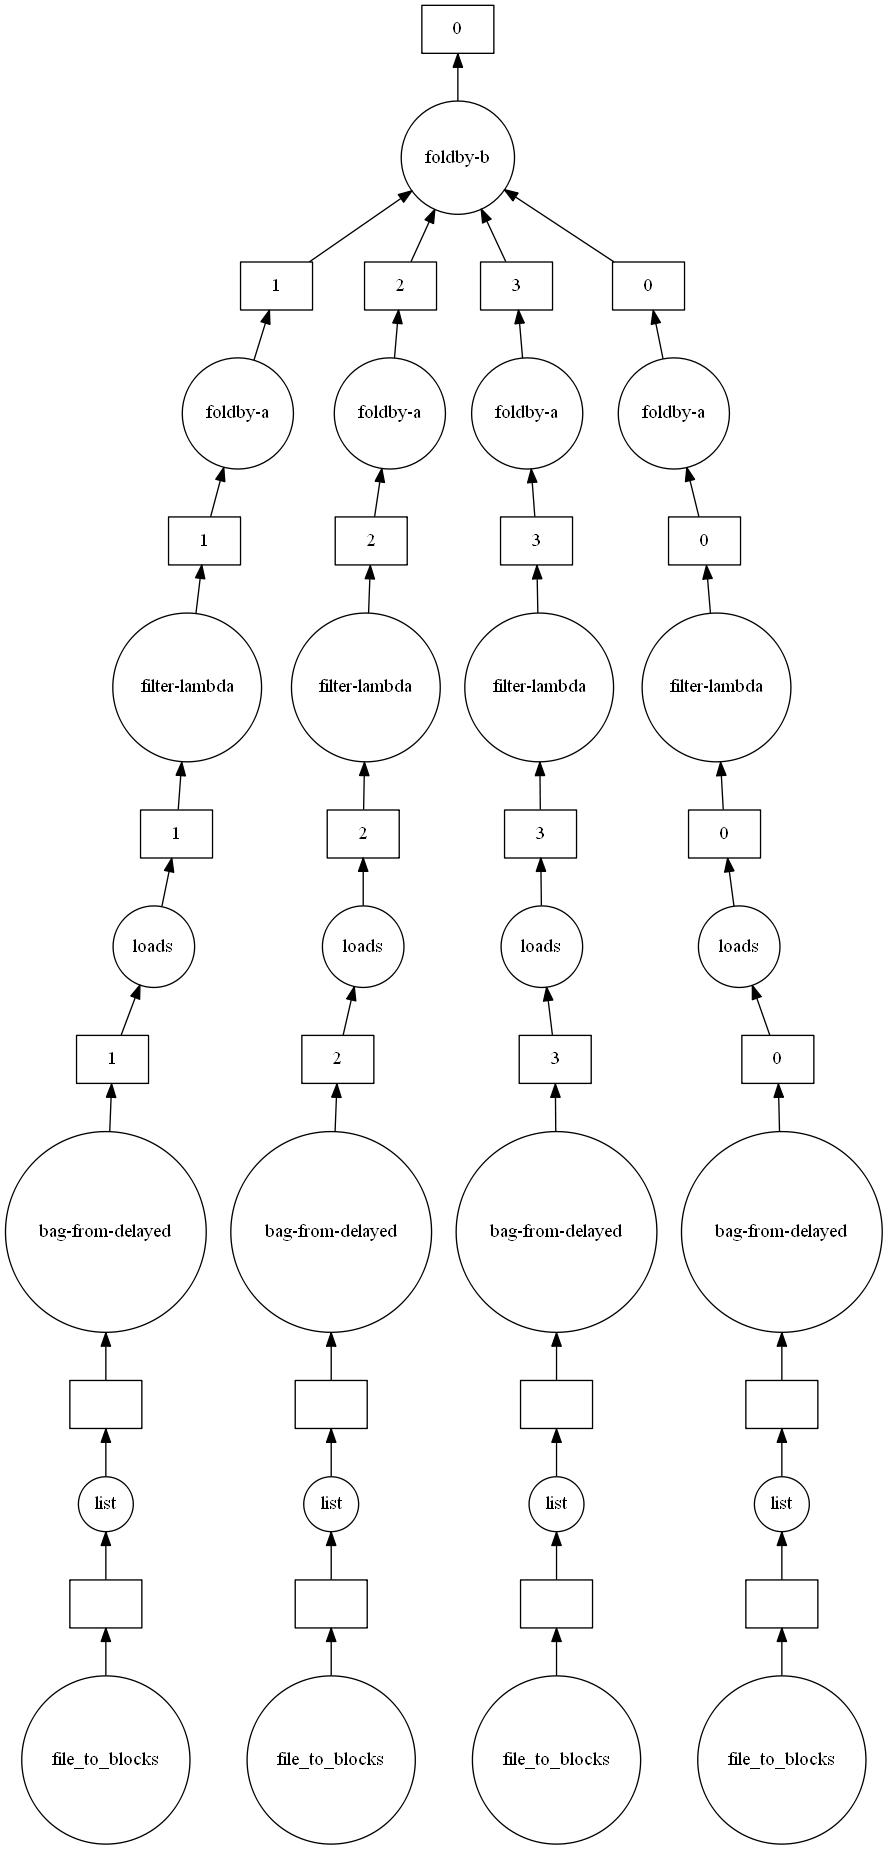

In [36]:
files = filenames[:4]
bag = db.read_text(files).map(json.loads).filter(lambda x: x['event_name'] == 'click')
result = bag.foldby(key='user_id',
               binop=incr,
               initial=0,
               combine=add,
               combine_initial=0)
result.visualize()

In [ ]:
# 2GB
run_experiment

## Task 2

In [12]:
def add_incr(tot, new):
    return (tot[0] + new['progress'], tot[1] + 1)

def combiner(t1, t2):
    print(t1)
    return (t1[0] + t2[0], t1[1] + t2[1])

def task_2_bag(files):
    bag = db.read_text(files).map(json.loads).filter(lambda x: x['event_name'] == 'media_exit')
    result = bag.foldby(key='fild_id',
                   binop=add_incr,
                   initial=(0,0),
                   combine=combiner,
                   combine_initial=(0,0))
    data_result = result.compute()
    end_result = sorted(map(lambda x: (x[0], x[1][0]/x[1][1]), data_result), key=(lambda x:x[1]), reverse=True)[0]
    return end_result

In [25]:
run_experiment(task_2_bag)

Working on 1x1GB
Trial #0
Completed Trial #0 in 26.385772705078125
Trial #1
Completed Trial #1 in 26.558673620224
Trial #2
Completed Trial #2 in 27.91189193725586
Completed 1x1GB': [26.385772705078125, 26.558673620224, 27.91189193725586]
Working on 2x1GB
Trial #0
Completed Trial #0 in 29.881765127182007
Trial #1
Completed Trial #1 in 29.46801257133484
Trial #2
Completed Trial #2 in 29.47500514984131
Completed 2x1GB': [29.881765127182007, 29.46801257133484, 29.47500514984131]
Working on 4x1GB
Trial #0
Completed Trial #0 in 38.16199254989624
Trial #1
Completed Trial #1 in 35.60845732688904
Trial #2
Completed Trial #2 in 35.85331320762634
Completed 4x1GB': [38.16199254989624, 35.60845732688904, 35.85331320762634]
Working on 8x1GB
Trial #0
Completed Trial #0 in 60.61002278327942
Trial #1
Completed Trial #1 in 66.48415803909302
Trial #2
Completed Trial #2 in 65.14639353752136
Completed 8x1GB': [60.61002278327942, 66.48415803909302, 65.14639353752136]


[[26.385772705078125, 26.558673620224, 27.91189193725586],
 [29.881765127182007, 29.46801257133484, 29.47500514984131],
 [38.16199254989624, 35.60845732688904, 35.85331320762634],
 [60.61002278327942, 66.48415803909302, 65.14639353752136]]

In [13]:
# 2GB
run_experiment(task_2_bag)

Working on 1x1GB
Trial #0
Completed Trial #0 in 45.711700677871704
Trial #1
Completed Trial #1 in 45.86261320114136
Trial #2
Completed Trial #2 in 45.199992656707764
Completed 1x1GB': [45.711700677871704, 45.86261320114136, 45.199992656707764]
Working on 2x1GB
Trial #0
Completed Trial #0 in 47.12188720703125
Trial #1
Completed Trial #1 in 46.955984592437744
Trial #2
Completed Trial #2 in 50.55591130256653
Completed 2x1GB': [47.12188720703125, 46.955984592437744, 50.55591130256653]
Working on 4x1GB
Trial #0
Completed Trial #0 in 64.54386615753174
Trial #1
Completed Trial #1 in 67.29627752304077
Trial #2
Completed Trial #2 in 63.19090795516968
Completed 4x1GB': [64.54386615753174, 67.29627752304077, 63.19090795516968]
Working on 8x1GB
Trial #0
Completed Trial #0 in 106.43675994873047
Trial #1
Completed Trial #1 in 115.20682263374329
Trial #2
Completed Trial #2 in 104.86285376548767
Completed 8x1GB': [106.43675994873047, 115.20682263374329, 104.86285376548767]
Working on 16x1GB
Trial #0
C

[[45.711700677871704, 45.86261320114136, 45.199992656707764],
 [47.12188720703125, 46.955984592437744, 50.55591130256653],
 [64.54386615753174, 67.29627752304077, 63.19090795516968],
 [106.43675994873047, 115.20682263374329, 104.86285376548767],
 [216.3156259059906, 214.79260325431824, 220.07178282737732]]

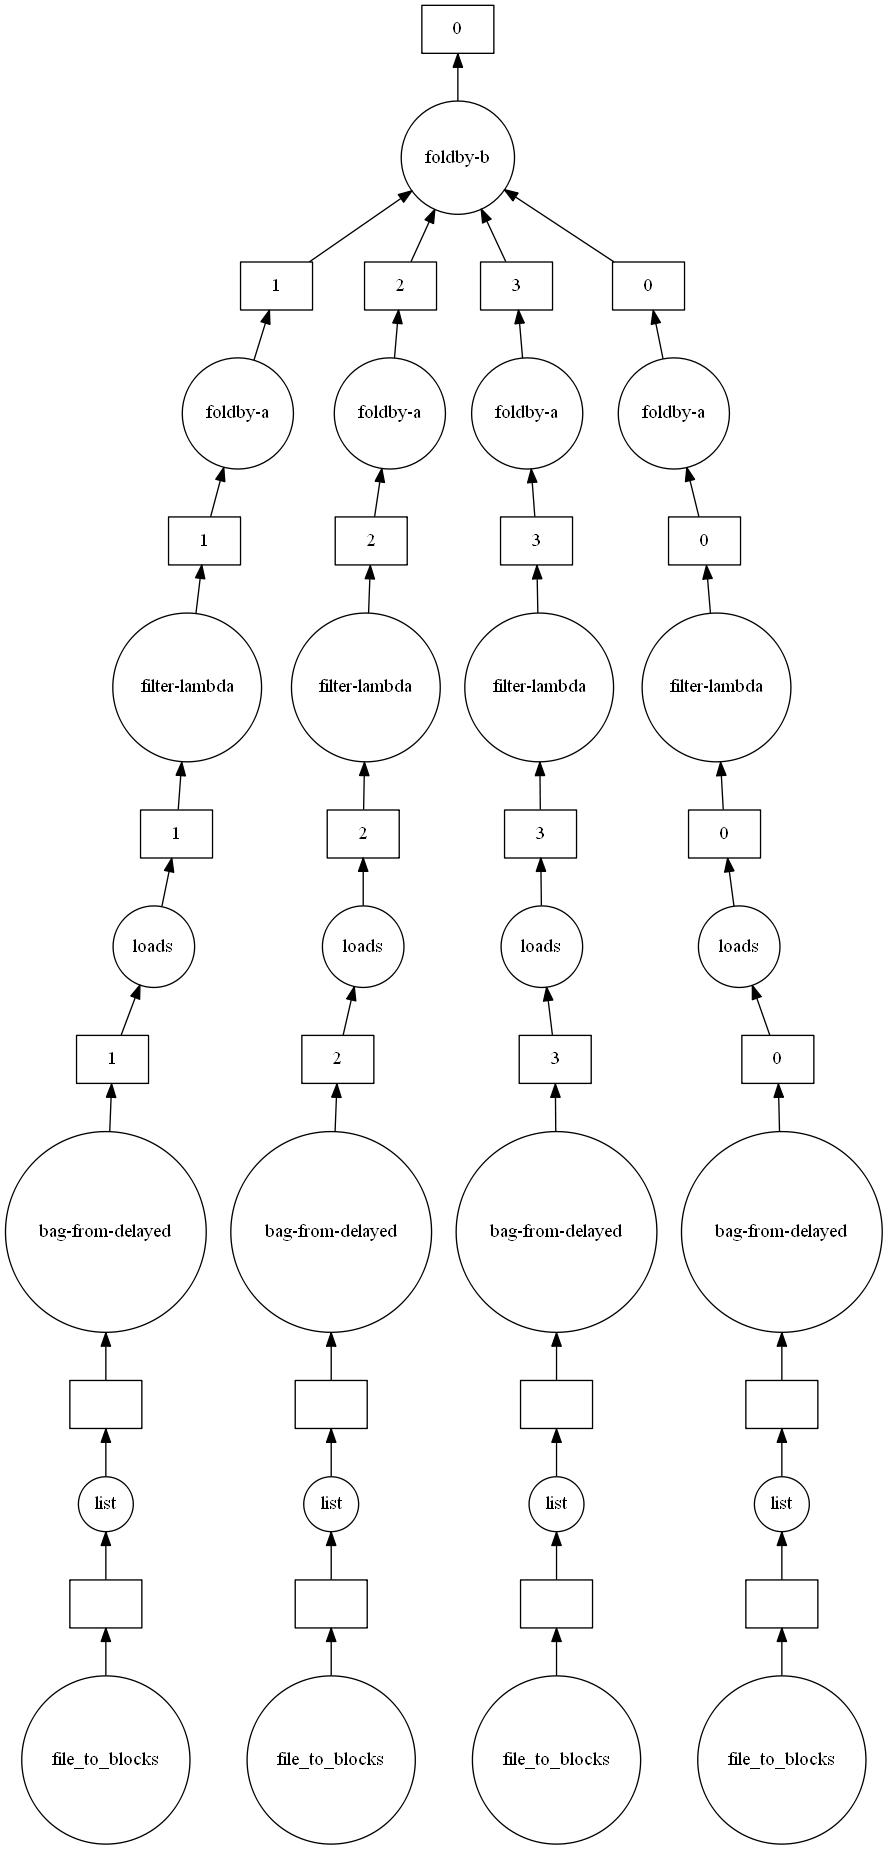

In [40]:
bag = db.read_text(files).map(json.loads).filter(lambda x: x['event_name'] == 'media_exit')
result = bag.foldby(key='fild_id',
               binop=add_incr,
               initial=(0,0),
               combine=combiner,
               combine_initial=(0,0))
result.visualize()

In [13]:
run_experiment(task_2_bag, specific=16)

Working on 16x1GB
Trial #0
Completed Trial #0 in 111.54685807228088
Trial #1
Completed Trial #1 in 110.77984547615051
Trial #2
Completed Trial #2 in 115.56153559684753
Completed 16x1GB': [111.54685807228088, 110.77984547615051, 115.56153559684753]


[[111.54685807228088, 110.77984547615051, 115.56153559684753]]

## Task 3

In [14]:
import datetime as dt

def convert_datetime(entry):
    entry['event_timestamp'] = dt.datetime.fromisoformat(entry['event_timestamp'])
    return entry

from operator import add
def incr(tot, _):
    return tot+1

In [42]:
# Most searched for item before 12 noon from people located in Canada
cutoff = dt.time(hour=12)
bag = db.read_text(files).map(json.loads)
bag = (bag.filter(lambda x: ((x['event_name'] == 'item_search') and (x['geo'] == 'Canada')))
       .map(convert_datetime)
       .filter(lambda x: x['event_timestamp'].time() < cutoff)
      .foldby(key='search_text',
                   binop=incr,
                   initial=0,
                   combine=add,
                   combine_initial=0))
# bag = bag.map(lambda x: x['event_name'])

In [15]:
def task_3_bag(files):
    cutoff = dt.time(hour=12)
    bag = db.read_text(files).map(json.loads)
    bag = (bag.filter(lambda x: ((x['event_name'] == 'item_search') and (x['geo'] == 'Canada')))
           .map(convert_datetime)
           .filter(lambda x: x['event_timestamp'].time() < cutoff)
          .map(lambda x: (x['search_text']))
            .frequencies(sort=True))
    return bag.take(1)

In [16]:
run_experiment(task_3_bag)

Working on 1x1GB
Trial #0
Completed Trial #0 in 45.85063195228577
Trial #1
Completed Trial #1 in 44.742273807525635
Trial #2
Completed Trial #2 in 44.950133323669434
Completed 1x1GB': [45.85063195228577, 44.742273807525635, 44.950133323669434]
Working on 2x1GB
Trial #0
Completed Trial #0 in 46.73010802268982
Trial #1
Completed Trial #1 in 47.01495146751404
Trial #2
Completed Trial #2 in 50.113165855407715
Completed 2x1GB': [46.73010802268982, 47.01495146751404, 50.113165855407715]
Working on 4x1GB
Trial #0
Completed Trial #0 in 66.74659776687622
Trial #1
Completed Trial #1 in 64.06813716888428
Trial #2
Completed Trial #2 in 62.19023060798645
Completed 4x1GB': [66.74659776687622, 64.06813716888428, 62.19023060798645]
Working on 8x1GB
Trial #0
Completed Trial #0 in 108.93893599510193
Trial #1
Completed Trial #1 in 108.84977769851685
Trial #2
Completed Trial #2 in 107.69705700874329
Completed 8x1GB': [108.93893599510193, 108.84977769851685, 107.69705700874329]
Working on 16x1GB
Trial #0
C

[[45.85063195228577, 44.742273807525635, 44.950133323669434],
 [46.73010802268982, 47.01495146751404, 50.113165855407715],
 [66.74659776687622, 64.06813716888428, 62.19023060798645],
 [108.93893599510193, 108.84977769851685, 107.69705700874329],
 [219.92860555648804, 214.58877277374268, 218.8126926422119]]

In [17]:
run_experiment(task_3_bag, specific=16)

Working on 16x1GB
Trial #0
Completed Trial #0 in 114.38818407058716
Trial #1
Completed Trial #1 in 106.07399368286133
Trial #2
Completed Trial #2 in 110.37927269935608
Completed 16x1GB': [114.38818407058716, 106.07399368286133, 110.37927269935608]


[[114.38818407058716, 106.07399368286133, 110.37927269935608]]

## Task Merge

In [14]:
import dask

In [15]:
# Functions
from operator import add
def incr(tot, _):
    return tot+1

def add_incr(tot, new):
    return (tot[0] + new['progress'], tot[1] + 1)

def combiner(t1, t2):
    print(t1)
    return (t1[0] + t2[0], t1[1] + t2[1])

In [16]:
files = filenames[:2]
bag = db.read_text(files).map(json.loads)
task1 = bag.filter(lambda x: x['event_name'] == 'click').foldby(key='user_id',
                   binop=incr,
                   initial=0,
                   combine=add,
                   combine_initial=0)
task2 = bag.filter(lambda x: x['event_name'] == 'media_exit').foldby(key='fild_id',
               binop=add_incr,
               initial=(0,0),
               combine=combiner,
               combine_initial=(0,0))

In [17]:
dask.compute(task1, task2)

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting


KilledWorker: ("('bag-from-delayed-file_to_blocks-list-loads-58f8e93105580fbd936b675474ef5985', 1)", <Worker 'tcp://127.0.0.1:2528', name: 2, memory: 0, processing: 1>)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


## BREAK

In [ ]:

start_time = time.time()
bag = db.read_text(filenames[:file_set]).map(json.loads).filter(lambda x: x['event_name'] == 'click')
result = bag.foldby(key='user_id',
               binop=incr,
               initial=0,
               combine=add,
               combine_initial=0)
data_result = result.compute()
end_result = list(map(lambda x: (x[0],x[1]/2), data_result))
end_time = time.time() - start_time

In [7]:
from dask.distributed import performance_report

In [11]:
with performance_report(filename='task-2x1.html'):
    bag = db.read_text(filenames[:2]).map(json.loads).filter(lambda x: x['event_name'] == 'click')
    result = bag.foldby(key='user_id',
                   binop=incr,
                   initial=0,
                   combine=add,
                   combine_initial=0)
    data_result = result.compute()

In [ ]:
result.visualize()

In [ ]:
, progress
# import dask.bag as db

client = Client(n_workers=8)

In [ ]:
# db = db.read_text(filenames[:-1]).map(json.loads).filter(lambda x: x['event_name'] == "click").groupby('user_i')

In [ ]:
bag = db.read_text(filenames[-1]).map(json.loads).filter(lambda x: x['event_name'] == "click")
bag.count().visualize()

In [ ]:
def load_day_filter(filename, event_filter):
    events = []
    i = 0
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = json.loads(line)
            if line['event_name'] == event_filter:
                events.append(line)
            else:
                pass
    return events

start_time = time.time()
raw_data = load_day_filter(filenames[-1], 'click')
df = pd.DataFrame(raw_data)
df[df.event_name == "click"].groupby('user_id').count()['event_name'].mean()
end_time = time.time() - start_time
end_time